In [161]:
import os
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import pearsonr
import glob
import seaborn
import matplotlib.pyplot as plt

import redcap

API_Token = 'E39C06339AD734320FF31D02CA0DB8CA'
project = redcap.Project('https://redcap.dellmed.utexas.edu/api/', API_Token)

# extract metadata for field to label mapping
field_to_label = {f['field_name']: f['field_label'] for f in project.metadata}

In [139]:

# reward C12
# Inhibition C8 (SAL) & C9 (FPN)
datadir = '/Users/tbw665/remote/corral/anibal/devmismatch/preproc/ulg/output/'

sublist = os.listdir(datadir)

timeseries = []
c12_c8_corr = []
c12_c9_corr = []

for subID in sublist:

    run1_dir = glob.glob(datadir + subID + '/output/pipeline_analysis_nuisance/' + subID + '_ses-0/functional_to_standard/_scan_REST_run-01*')[-1]

    run2_dir = datadir + subID + '/output/pipeline_analysis_nuisance/' + subID + '_ses-0/functional_to_standard/_scan_REST_run-02'

    run1_ts = pd.concat([pd.read_csv(item, header = None) for item in glob.glob(run1_dir + '/_selector_CSF-2mmE-M_aC-WM-2mm-DPC5_G-M_M-SDB_P-2/Yeo_12Comp_PrActGivenComp_FSL_MNI152_3mm_thr_2.3_bin_00*1D')], axis=1)
    run2_ts = pd.concat([pd.read_csv(item, header = None) for item in glob.glob(run2_dir + '/_selector_CSF-2mmE-M_aC-WM-2mm-DPC5_G-M_M-SDB_P-2/Yeo_12Comp_PrActGivenComp_FSL_MNI152_3mm_thr_2.3_bin_00*1D')], axis=1)

    # remove first 4 volumes
    
#     run1_ts = run1_ts.iloc[4:]
#     run2_ts = run2_ts.iloc[4:]
    
    timeseries_concat = run1_ts.append(run2_ts)

    c12_c8_corr.append(tuple((subID, pearsonr(timeseries_concat.iloc[:,7],timeseries_concat.iloc[:,11])[0])))
    c12_c9_corr.append(tuple((subID, pearsonr(timeseries_concat.iloc[:,8],timeseries_concat.iloc[:,11])[0])))
    
        
    if timeseries_concat.values.shape[0] == 800:
        timeseries.append(timeseries_concat.values)

#     print(pearsonr(timeseries_concat[7],timeseries_concat[11])[0])
#     print(timeseries_concat.values.shape)
#     print(subID)
    
# stack all sub timeseries, then take mean
timeseries_np = np.stack( timeseries, axis=0 )

mean_timeseries = np.mean(timeseries_np, axis=0)
mean_timeseries.shape





(800, 12)

In [100]:
# reward C12
# Inhibition C8 (SAL) & C9 (FPN)
datadir = '/Users/tbw665/remote/corral/anibal/devmismatch/preproc/ulg/output'

sublist = os.listdir(datadir)

timeseries = []
c12_c8_corr = []
c12_c9_corr = []

for subID in sublist:

    run1 = glob.glob(datadir + '/' + subID + '/output/pipeline_analysis_nuisance/' + subID + '_ses-0/spatial_map_timeseries/_scan_REST_run-01*/_selector_CSF-2mmE-M_aC-WM-2mm-DPC5_G-M_M-SDB_P-2/_spatial_map_Yeo_12Comp_PrActGivenComp_FSL_MNI152_2mm_spatial_map_file_..tmp..Yeo_12Comp_PrActGivenComp_FSL_MNI152_2mm.nii.gz/spatial_map_timeseries.txt')[-1]
    run2 = datadir + '/' + subID + '/output/pipeline_analysis_nuisance/' + subID + '_ses-0/spatial_map_timeseries/_scan_REST_run-02/_selector_CSF-2mmE-M_aC-WM-2mm-DPC5_G-M_M-SDB_P-2/_spatial_map_Yeo_12Comp_PrActGivenComp_FSL_MNI152_2mm_spatial_map_file_..tmp..Yeo_12Comp_PrActGivenComp_FSL_MNI152_2mm.nii.gz/spatial_map_timeseries.txt'

    files = [run1, run2]
    frames = []

    for file in files:
        frames.append(pd.read_csv(file, sep="  ", header=None))

    timeseries_concat = pd.concat(frames)
    c12_c8_corr.append(tuple((subID, pearsonr(timeseries_concat[7],timeseries_concat[11])[0])))
    c12_c9_corr.append(tuple((subID, pearsonr(timeseries_concat[8],timeseries_concat[11])[0])))
    
    
    if timeseries_concat.values.shape[0] == 792:
        timeseries.append(timeseries_concat.values)

#     print(pearsonr(timeseries_concat[7],timeseries_concat[11])[0])
#     print(timeseries_concat.values.shape)
#     print(subID)
    
# stack all sub timeseries, then take mean
timeseries_np = np.stack( timeseries, axis=0 )

mean_timeseries = np.mean(timeseries_np, axis=0)
mean_timeseries.shape





/Users/tbw665/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


ValueError: need at least one array to stack

In [249]:
len(c12_c9_corr)

39

In [140]:
c12_c9_corr = pd.DataFrame(c12_c9_corr, columns=['subID', 'r'])
c12_c9_corr['r_z'] = c12_c9_corr['r'].apply(np.arctanh)
c12_c9_corr

subID         r       r_z
0   sub-ULG013 -0.296245 -0.305398
1   sub-ULG003 -0.204666 -0.207598
2   sub-ULG014 -0.385010 -0.405929
3   sub-ULG022 -0.426726 -0.455886
4   sub-ULG016 -0.153709 -0.154937
5   sub-ULG035 -0.349352 -0.364706
6   sub-ULG040 -0.527210 -0.586273
7   sub-ULG027 -0.141174 -0.142124
8   sub-ULG023 -0.257093 -0.262994
9   sub-ULG036 -0.023015 -0.023019
10  sub-ULG020 -0.355968 -0.372262
11  sub-ULG024 -0.166814 -0.168387
12  sub-ULG025 -0.353667 -0.369629
13  sub-ULG019 -0.398503 -0.421868
14  sub-ULG018 -0.288019 -0.296405
15  sub-ULG004 -0.312305 -0.323097
16  sub-ULG043 -0.313297 -0.324198
17  sub-ULG038 -0.220900 -0.224603
18  sub-ULG009 -0.362890 -0.380210
19  sub-ULG044 -0.271381 -0.278354
20  sub-ULG010 -0.559360 -0.631901
21  sub-ULG026 -0.271052 -0.277999
22  sub-ULG001 -0.008037 -0.008037
23  sub-ULG029 -0.242782 -0.247728
24  sub-ULG031 -0.197048 -0.199659
25  sub-ULG046 -0.291373 -0.300066
26  sub-ULG006 -0.329155 -0.341880
27  sub-ULG002 -0.073664 -0.073798
28  sub-ULG011 -0.244976 -0.250061
29  sub-ULG017 -0.071132 -0.071253
30  sub-ULG032 -0.048433 -0.048471
31  sub-ULG012 -0.264975 -0.271451
32  sub-ULG028 -0.354862 -0.370995
33  sub-ULG037 -0.413267 -0.439544
34  sub-ULG033 -0.265044 -0.271526
35  sub-ULG039 -0.199196 -0.201895
36  sub-ULG021 -0.349321 -0.364670
37  sub-ULG034 -0.317167 -0.328494
38  sub-ULG042 -0.358315 -0.374951

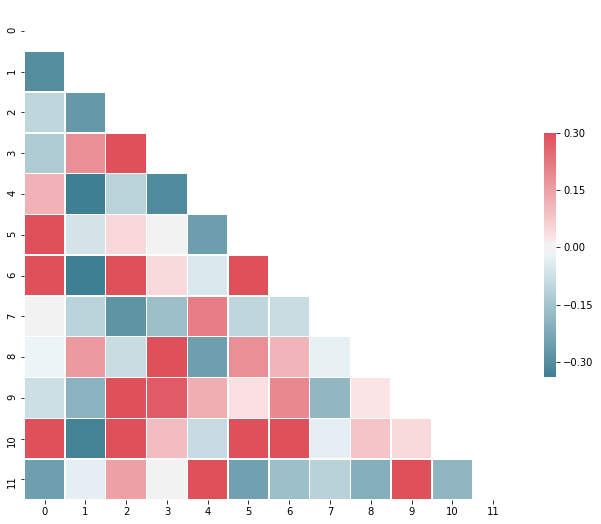

In [64]:
# plot mean correlation matrix

mask = np.zeros_like(timeseries_concat.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
cmap = seaborn.diverging_palette(220, 10, as_cmap=True)

# plot mean corr mat
seaborn.heatmap(pd.DataFrame(data=mean_timeseries).corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [150]:
c12_c9_corr['r_z']

0    -0.305398
1    -0.207598
2    -0.405929
3    -0.455886
4    -0.154937
5    -0.364706
6    -0.586273
7    -0.142124
8    -0.262994
9    -0.023019
10   -0.372262
11   -0.168387
12   -0.369629
13   -0.421868
14   -0.296405
15   -0.323097
16   -0.324198
17   -0.224603
18   -0.380210
19   -0.278354
20   -0.631901
21   -0.277999
22   -0.008037
23   -0.247728
24   -0.199659
25   -0.300066
26   -0.341880
27   -0.073798
28   -0.250061
29   -0.071253
30   -0.048471
31   -0.271451
32   -0.370995
33   -0.439544
34   -0.271526
35   -0.201895
36   -0.364670
37   -0.328494
38   -0.374951
Name: r_z, dtype: float64

In [149]:
[i[2] for i in c12_c9_corr]

IndexError: string index out of range

/Users/tbw665/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


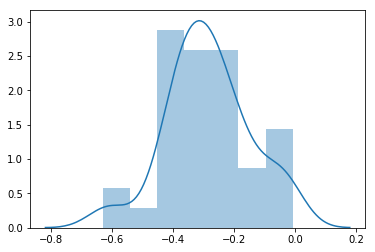

In [152]:
# inspect spread of correlation values between C12 and C9

ax = seaborn.distplot([c12_c9_corr['r_z']])


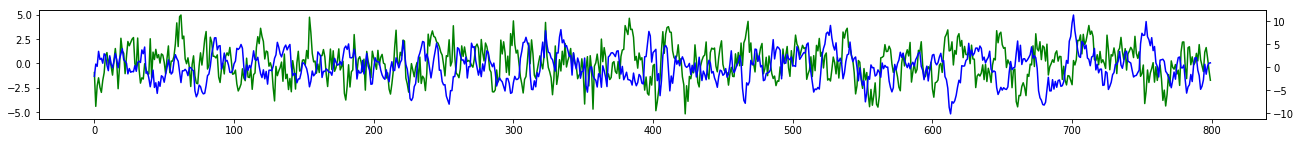

In [107]:
plt.figure(figsize=(22, 2))

seaborn.lineplot(data=pd.DataFrame(mean_timeseries)[8], color="g", ci = None)
ax2 = plt.twinx()
seaborn.lineplot(data=pd.DataFrame(mean_timeseries)[11], color="b", ci = None, ax=ax2)


In [73]:
# load substance use group
substance_use_inventory = pd.read_excel('ulg_sui_summary.xlsx', index_col=0)
substance_use_inventory = substance_use_inventory.iloc[:, :-3]
substance_use_inventory['subID'] = substance_use_inventory.index
substance_use_inventory['subID'] = substance_use_inventory['subID'].astype(str)
substance_use_inventory['subID'] = substance_use_inventory['subID'].str.zfill(3)
substance_use_inventory['subID'] = 'sub-ULG' + substance_use_inventory['subID'].astype(str)

substance_use_inventory = substance_use_inventory[substance_use_inventory['subID'].isin(sublist)]
substance_use_inventory = substance_use_inventory.dropna()

In [153]:
# merge SUI with C12-C8_corr

substance_use_inventory = substance_use_inventory.merge(pd.DataFrame(c12_c9_corr, columns=['subID', 'r_z']), on='subID', how='outer')

substance_use_inventory.groupby(substance_use_inventory.columns[0])['r_z'].describe()


count      mean       std  \
A full drink of beer, wine or liquor (run, vodk...                              
0.0                                                   9.0 -0.319655  0.171788   
1.0                                                  19.0 -0.288055  0.123717   

                                                         min       25%  \
A full drink of beer, wine or liquor (run, vodk...                       
0.0                                                -0.631901 -0.372262   
1.0                                                -0.586273 -0.367150   

                                                         50%       75%  \
A full drink of beer, wine or liquor (run, vodk...                       
0.0                                                -0.341880 -0.271451   
1.0                                                -0.277999 -0.227663   

                                                         max  
A full drink of beer, wine or liquor (run, vodk...            
0.0                                                -0.008037  
1.0                                                -0.071253

In [154]:
# group difference in reward-inhibition FC 
arr1 = substance_use_inventory.loc[substance_use_inventory[substance_use_inventory.columns[0]] == 1]['r_z'].values
arr2 = substance_use_inventory.loc[substance_use_inventory[substance_use_inventory.columns[0]] == 0]['r_z'].values
stats.ttest_ind(arr1,arr2, equal_var = False)


Ttest_indResult(statistic=0.49444116793495, pvalue=0.6298571045286856)

# ASR substance use (last 6 months)

In [79]:
# read in ASR data

df_asr_scored = pd.read_csv('/Users/tbw665/Box/CNL_LabFiles/ULG/ASEBA_Scored_Data.csv', index_col=False)

df_asr_scored['record_id'] = df_asr_scored['AssessedPersonId'].str.split('-').str[0]
df_asr_scored['record_id'] = df_asr_scored['record_id'].replace({'ulg': 'ulg_'}, regex=True)
df_asr_scored = df_asr_scored.set_index('record_id')

# make subID col
df_asr_scored['subID']=df_asr_scored.index
df_asr_scored['subID'] = df_asr_scored['subID'].str.replace('ulg_', 'sub-ULG', regex=True)

df_asr_scored.filter(regex=r'(Total|TScore|Percentile|record_id)', axis=1).head()

df_asr_scored_tscore = df_asr_scored.filter(regex=r'(TScore|subID)', axis=1)
df_asr_scored_perc = df_asr_scored.filter(regex=r'(Percentile|subID)', axis=1)

df_asr_scored = df_asr_scored.fillna(0)

In [183]:
# substance use group label

df_asr_scored_perc['ASR_SU_group'] = np.where(df_asr_scored_perc['Alcohol_Days_Drunk_Percentile'] > 50, 1, 0)
df_asr_scored_perc[['subID', 'Alcohol_Days_Drunk_Percentile', 'Drugs_Days_Used_Percentile', 'Mean_Substance_Use_Percentile', 'ASR_SU_group']].head()

subID  Alcohol_Days_Drunk_Percentile  \
record_id                                              
ulg_022    sub-ULG022                             50   
ulg_023    sub-ULG023                             95   
ulg_024    sub-ULG024                             50   
ulg_025    sub-ULG025                             50   
ulg_026    sub-ULG026                             87   

           Drugs_Days_Used_Percentile  Mean_Substance_Use_Percentile  \
record_id                                                              
ulg_022                            50                           50.0   
ulg_023                            99                           97.0   
ulg_024                            50                           50.0   
ulg_025                            50                           50.0   
ulg_026                            50                           69.0   

           ASR_SU_group  
record_id                
ulg_022               0  
ulg_023               1  
ulg_024               0  
ulg_025               0  
ulg_026               1

In [225]:
# merge with ABCD SUI
df_SU_ASR_ABCD = df_asr_scored_perc[['subID', 'Alcohol_Days_Drunk_Percentile', 'Drugs_Days_Used_Percentile', 'Mean_Substance_Use_Percentile', 'ASR_SU_group']].merge(substance_use_inventory, on='subID', how='outer')
df_SU_ASR_ABCD = df_SU_ASR_ABCD.dropna()

df_SU_ASR_ABCD.groupby(df_SU_ASR_ABCD['ASR_SU_group'])['r_z'].describe()



count      mean       std       min       25%       50%  \
ASR_SU_group                                                            
0.0            16.0 -0.331432  0.149587 -0.631901 -0.374249 -0.353293   
1.0            11.0 -0.258130  0.117690 -0.439544 -0.325795 -0.277999   

                   75%       max  
ASR_SU_group                      
0.0          -0.265520 -0.008037  
1.0          -0.196092 -0.071253

Text(0.5, 0, 'Substance Use')

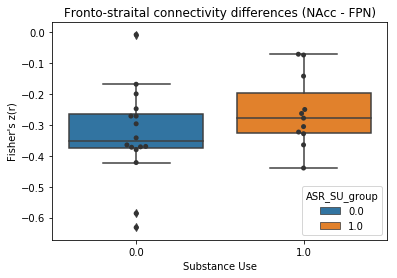

In [160]:
ax = seaborn.boxplot(x='ASR_SU_group', y="r_z", data=df_SU_ASR_ABCD, hue = 'ASR_SU_group', dodge = False)
ax = seaborn.swarmplot(x="ASR_SU_group", y="r_z", data=df_SU_ASR_ABCD, color=".2")
ax.set_title('Fronto-straital connectivity differences (NAcc - FPN)')
ax.set_ylabel("Fisher's z(r)")
ax.set_xlabel("Substance Use")

In [157]:
# group difference in reward-inhibition FC 

arr1 = df_SU_ASR_ABCD.loc[df_SU_ASR_ABCD['ASR_SU_group'] == 1]['r_z'].values
arr2 = df_SU_ASR_ABCD.loc[df_SU_ASR_ABCD['ASR_SU_group'] == 0]['r_z'].values
stats.ttest_ind(arr1,arr2, equal_var = False)

Ttest_indResult(statistic=1.4218860494578187, pvalue=0.16769350059741728)

# BIS/BAS

In [182]:

# extract list of field names

varlist = [key for key, val in field_to_label.items() if 'bis_' in key][2:] 
varlist[-4:]

# export data from redcap to notebook
bis_fieldlist = ['record_id', 'redcap_event_name' ] + varlist[-4:] 

df_bis = project.export_records(fields=bis_fieldlist, format='df')

df_bis = df_bis.iloc[df_bis.index.get_level_values('redcap_event_name') == 'home_surveys_arm_1']
df_bis = df_bis.rename(columns=field_to_label)

df_bis.head()

BAS Drive  BAS Fun Seeking  \
record_id redcap_event_name                                
ulg_001   home_surveys_arm_1        7.0              7.0   
ulg_002   home_surveys_arm_1       12.0              8.0   
ulg_003   home_surveys_arm_1       11.0              7.0   
ulg_004   home_surveys_arm_1        7.0              5.0   
ulg_006   home_surveys_arm_1       12.0             11.0   

                              BAS Reward Responsiveness   BIS  
record_id redcap_event_name                                    
ulg_001   home_surveys_arm_1                        7.0  16.0  
ulg_002   home_surveys_arm_1                        7.0  11.0  
ulg_003   home_surveys_arm_1                        9.0  11.0  
ulg_004   home_surveys_arm_1                        9.0  15.0  
ulg_006   home_surveys_arm_1                       11.0  17.0

In [190]:
# make subID col
df_bis['subID'] = df_bis.index.get_level_values('record_id')
df_bis['subID'] = df_bis['subID'].str.replace('ulg_', 'sub-ULG', regex=True)
df_bis.head()

BAS Drive  BAS Fun Seeking  \
record_id redcap_event_name                                
ulg_001   home_surveys_arm_1        7.0              7.0   
ulg_002   home_surveys_arm_1       12.0              8.0   
ulg_003   home_surveys_arm_1       11.0              7.0   
ulg_004   home_surveys_arm_1        7.0              5.0   
ulg_006   home_surveys_arm_1       12.0             11.0   

                              BAS Reward Responsiveness   BIS       subID  
record_id redcap_event_name                                                
ulg_001   home_surveys_arm_1                        7.0  16.0  sub-ULG001  
ulg_002   home_surveys_arm_1                        7.0  11.0  sub-ULG002  
ulg_003   home_surveys_arm_1                        9.0  11.0  sub-ULG003  
ulg_004   home_surveys_arm_1                        9.0  15.0  sub-ULG004  
ulg_006   home_surveys_arm_1                       11.0  17.0  sub-ULG006

In [226]:
# merge BIS/BAS with substance use and r_z

# merge with ABCD SUI
df_SU_ASR_ABCD = df_SU_ASR_ABCD.merge(df_bis, on='subID', how='outer')
df_SU_ASR_ABCD = df_SU_ASR_ABCD.dropna()

df_SU_ASR_ABCD.groupby(df_SU_ASR_ABCD['ASR_SU_group'])['BIS'].describe()



count       mean       std   min    25%   50%    75%   max
ASR_SU_group                                                            
0.0            16.0  14.937500  2.644964  10.0  13.75  15.0  16.25  19.0
1.0            11.0  14.272727  3.744086   8.0  12.50  14.0  15.50  23.0

In [193]:
df_SU_ASR_ABCD.head()

subID  Alcohol_Days_Drunk_Percentile  Drugs_Days_Used_Percentile  \
0  sub-ULG023                           95.0                        99.0   
1  sub-ULG024                           50.0                        50.0   
2  sub-ULG025                           50.0                        50.0   
3  sub-ULG026                           87.0                        50.0   
4  sub-ULG027                           93.0                        50.0   

   Mean_Substance_Use_Percentile  ASR_SU_group  \
0                           97.0           1.0   
1                           50.0           0.0   
2                           50.0           0.0   
3                           69.0           1.0   
4                           76.0           1.0   

   A full drink of beer, wine or liquor (run, vodka, gin, whiskey)  \
0                                                1.0                 
1                                                0.0                 
2                                                1.0                 
3                                                1.0                 
4                                                1.0                 

   A puff from a tobacco or electronic cigarette, or vape pens, or e-hookah  \
0                                                1.0                          
1                                                0.0                          
2                                                0.0                          
3                                                1.0                          
4                                                0.0                          

   Tobacco cigarette - more than just a puff  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   Electronic cigarettes, vape pens, or e-hookah - more than just a puff  \
0                                                0.0                       
1                                                0.0                       
2                                                0.0                       
3                                                1.0                       
4                                                0.0                       

   A puff or eaten any marijuana, also called pot, grass, weed or ganja?  \
0                                                1.0                       
1                                                0.0                       
2                                                0.0                       
3                                                0.0                       
4                                                0.0                       

   Smoke marijuana, also called pot, grass, weed, ganja - more than just a puff?  \
0                                                1.0                               
1                                                0.0                               
2                                                1.0                               
3                                                0.0                               
4                                                0.0                               

   c12_c8_corr  c12_c9_corr       r_z  BAS Drive  BAS Fun Seeking  \
0    -0.300686    -0.257093 -0.262994        6.0              6.0   
1    -0.238384    -0.166814 -0.168387       12.0             10.0   
2    -0.354107    -0.353667 -0.369629       13.0              9.0   
3    -0.180681    -0.271052 -0.277999       10.0              8.0   
4     0.086184    -0.141174 -0.142124       12.0              9.0   

   BAS Reward Responsiveness   BIS  
0                        6.0  14.0  
1                       11.0  11.0  
2                       11.0  14.0  
3                        7.0  16.0  
4                       11.0  15.0

Text(0.5, 0, 'Substance Use')

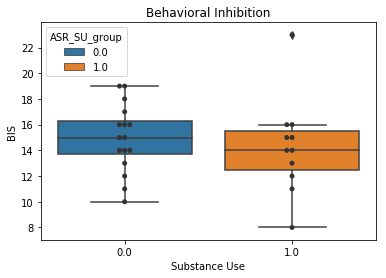

In [195]:
ax = seaborn.boxplot(x='ASR_SU_group', y="BIS", data=df_SU_ASR_ABCD, hue = 'ASR_SU_group', dodge = False)
ax = seaborn.swarmplot(x="ASR_SU_group", y="BIS", data=df_SU_ASR_ABCD, color=".2")
ax.set_title('Behavioral Inhibition')
ax.set_ylabel("BIS")
ax.set_xlabel("Substance Use")

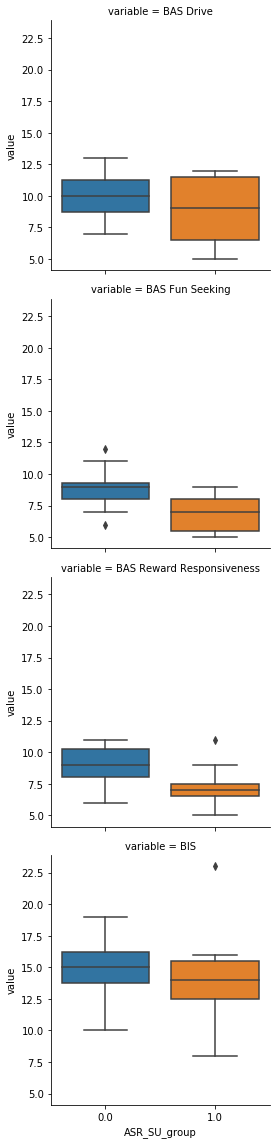

In [231]:
df_long = df_SU_ASR_ABCD[['subID','ASR_SU_group']].merge(df_bis, on='subID', how='outer').melt(id_vars=['ASR_SU_group', 'subID'])


g = seaborn.catplot(x="ASR_SU_group", y="value",
                 hue="ASR_SU_group", row="variable",
                 data=df_long, kind="box",
                 height=4, aspect=1, dodge = False);

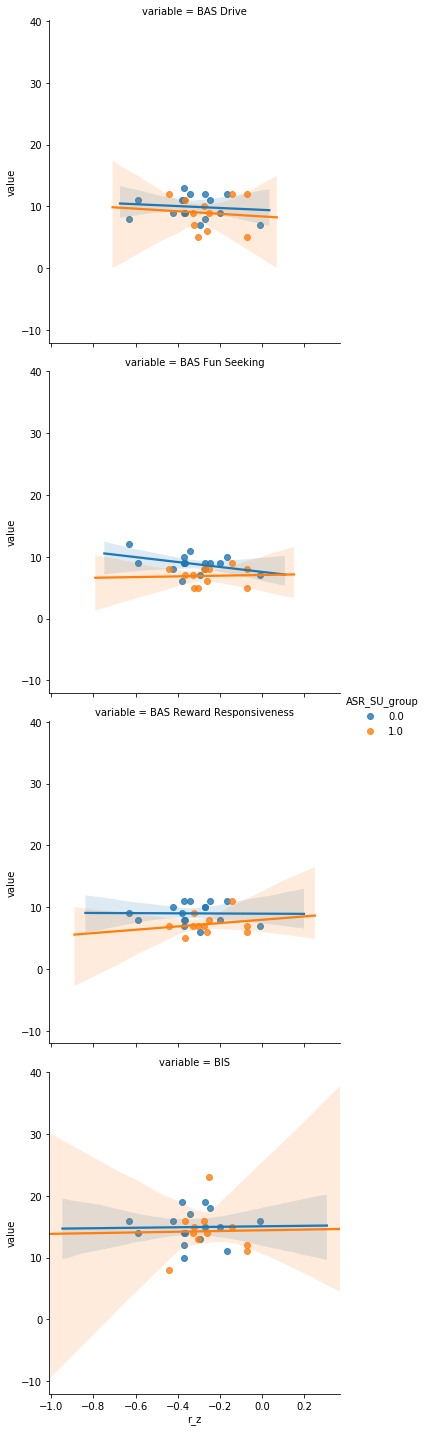

In [241]:
g = seaborn.lmplot(x="r_z", y="value", row="variable", hue = 'ASR_SU_group',
                data=df_SU_ASR_ABCD[['subID','ASR_SU_group','r_z']].merge(df_bis, on='subID', how='outer').melt(id_vars=['ASR_SU_group', 'subID', 'r_z'])
, height=5)

In [196]:
# group difference in BIS

arr1 = df_SU_ASR_ABCD.loc[df_SU_ASR_ABCD['ASR_SU_group'] == 1]['BIS'].values
arr2 = df_SU_ASR_ABCD.loc[df_SU_ASR_ABCD['ASR_SU_group'] == 0]['BIS'].values
stats.ttest_ind(arr1,arr2, equal_var = False)

Ttest_indResult(statistic=-0.5081238143626197, pvalue=0.6180019239795915)

In [242]:

# group difference in BAS Fun Seeking

arr1 = df_SU_ASR_ABCD.loc[df_SU_ASR_ABCD['ASR_SU_group'] == 1]['BAS Fun Seeking'].values
arr2 = df_SU_ASR_ABCD.loc[df_SU_ASR_ABCD['ASR_SU_group'] == 0]['BAS Fun Seeking'].values
stats.ttest_ind(arr1,arr2, equal_var = False)

Ttest_indResult(statistic=-3.418545100657929, pvalue=0.002439587794062618)

In [243]:

# group difference in BAS Reward Responsiveness	

arr1 = df_SU_ASR_ABCD.loc[df_SU_ASR_ABCD['ASR_SU_group'] == 1]['BAS Reward Responsiveness'].values
arr2 = df_SU_ASR_ABCD.loc[df_SU_ASR_ABCD['ASR_SU_group'] == 0]['BAS Reward Responsiveness'].values
stats.ttest_ind(arr1,arr2, equal_var = False)

Ttest_indResult(statistic=-2.715209412020225, pvalue=0.012706124500968558)

# UPPS-P

In [253]:
# export data from redcap to notebook
upps_fieldlist = ['record_id', 'redcap_event_name' ] + [key for key, val in field_to_label.items() if 'upps_' in key][-5:]  

df_upps = project.export_records(fields=upps_fieldlist, format='df')

df_upps = df_upps.iloc[df_upps.index.get_level_values('redcap_event_name') == 'home_surveys_arm_1']
df_upps = df_upps.rename(columns=field_to_label)

# make subID col
df_upps['subID']=df_upps.index.get_level_values('record_id')
df_upps['subID'] = df_upps['subID'].str.replace('ulg_', 'sub-ULG', regex=True)
df_upps.head()

(Negative) Urgency  (lack of) Premeditation  \
record_id redcap_event_name                                                 
ulg_001   home_surveys_arm_1                27.0                     27.0   
ulg_002   home_surveys_arm_1                18.0                     19.0   
ulg_003   home_surveys_arm_1                31.0                     20.0   
ulg_004   home_surveys_arm_1                25.0                     28.0   
ulg_006   home_surveys_arm_1                21.0                     21.0   

                              (lack of) Perseverance  Sensation Seeking  \
record_id redcap_event_name                                               
ulg_001   home_surveys_arm_1                    23.0               39.0   
ulg_002   home_surveys_arm_1                    27.0               33.0   
ulg_003   home_surveys_arm_1                    22.0               39.0   
ulg_004   home_surveys_arm_1                    18.0               47.0   
ulg_006   home_surveys_arm_1                    21.0               27.0   

                              Positive Urgency       subID  
record_id redcap_event_name                                 
ulg_001   home_surveys_arm_1              25.0  sub-ULG001  
ulg_002   home_surveys_arm_1              25.0  sub-ULG002  
ulg_003   home_surveys_arm_1              33.0  sub-ULG003  
ulg_004   home_surveys_arm_1              18.0  sub-ULG004  
ulg_006   home_surveys_arm_1              25.0  sub-ULG006

In [247]:
# merge UPPS-P with substance use and r_z

# merge with ABCD SUI
df_SU_ASR_ABCD = df_SU_ASR_ABCD[['subID','ASR_SU_group']].merge(df_upps, on='subID', how='outer')
df_SU_ASR_ABCD = df_SU_ASR_ABCD.dropna()

df_SU_ASR_ABCD.groupby(df_SU_ASR_ABCD['ASR_SU_group'])['Sensation Seeking'].describe()
df_SU_ASR_ABCD.groupby(df_SU_ASR_ABCD['ASR_SU_group'])['(Negative) Urgency'].describe()



count     mean       std   min    25%   50%    75%   max
ASR_SU_group                                                          
0.0            16.0  25.6875  5.275336  16.0  21.75  25.5  28.25  34.0
1.0            11.0  27.0000  7.810250  15.0  20.50  28.0  33.00  39.0

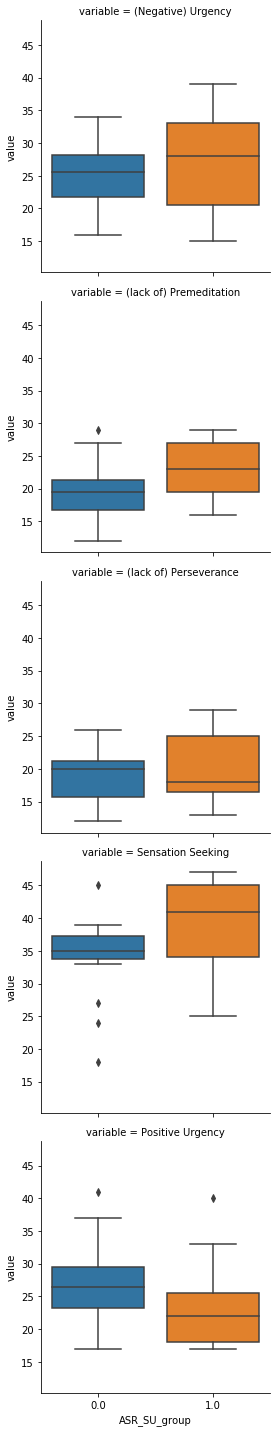

In [232]:
df_long = df_SU_ASR_ABCD[['subID','ASR_SU_group']].merge(df_upps, on='subID', how='outer').melt(id_vars=['ASR_SU_group', 'subID'])


g = seaborn.catplot(x="ASR_SU_group", y="value",
                 hue="ASR_SU_group", row="variable",
                 data=df_long, kind="box",
                 height=4, aspect=1, dodge = False);

In [250]:
df_SU_ASR_ABCD.columns

Index(['subID', 'ASR_SU_group', '(Negative) Urgency',
       '(lack of) Premeditation', '(lack of) Perseverance',
       'Sensation Seeking', 'Positive Urgency'],
      dtype='object')

In [248]:
# group difference in Sensation Seeking

arr1 = df_SU_ASR_ABCD.loc[df_SU_ASR_ABCD['ASR_SU_group'] == 1]['Sensation Seeking'].values
arr2 = df_SU_ASR_ABCD.loc[df_SU_ASR_ABCD['ASR_SU_group'] == 0]['Sensation Seeking'].values
stats.ttest_ind(arr1,arr2, equal_var = False)

Ttest_indResult(statistic=1.9515148550460004, pvalue=0.0652663664036839)

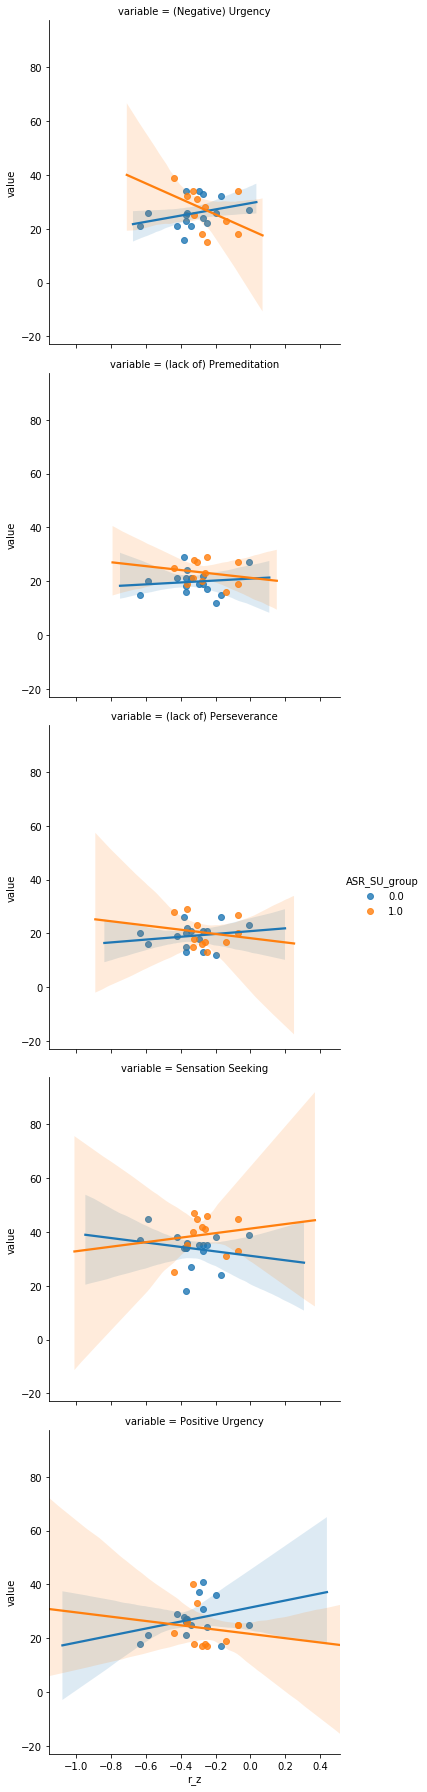

In [240]:
g = seaborn.lmplot(x="r_z", y="value", row="variable", hue = 'ASR_SU_group',
                data=df_SU_ASR_ABCD[['subID','ASR_SU_group','r_z']].merge(df_upps, on='subID', how='outer').melt(id_vars=['ASR_SU_group', 'subID', 'r_z'])
, height=5)